In [1]:
# Importing dependencies 
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import numpy as np

/Users/EricShaffer/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/EricShaffer/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/EricShaffer/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Use

In [2]:
# load in the zoo animal dataset
zoo_animals = pd.read_csv("data/zoo_animals.csv")
zoo_animals.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo_animals = zoo_animals.drop(columns=['animal name'])

In [4]:
X = zoo_animals.iloc[:,:-1]
Y = zoo_animals.iloc[:,-1]

In [5]:
y = Y - 1

In [6]:
print(X.shape)
print(y.shape)

(101, 16)
(101,)


In [7]:
y.max()

6

In [8]:
# Split data into train and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# scaling our data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [10]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
 # One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
 

In [13]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [14]:
len(y_train_categorical[0])

7

In [15]:
from tensorflow.keras.layers import Dense
number_inputs = X.shape[1]
number_hidden_nodes = 4 * number_inputs
model.add(Dense(units=number_hidden_nodes,activation='relu', input_dim=number_inputs))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.add(Dense(units=len(y_train_categorical[0]), activation='softmax'))

In [17]:
# model summary
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 1,543
Trainable params: 1,543
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
 # Fit (train) the model
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
75/75 - 0s - loss: 1.6446 - acc: 0.4400
Epoch 2/50
75/75 - 0s - loss: 1.5347 - acc: 0.4933
Epoch 3/50
75/75 - 0s - loss: 1.4296 - acc: 0.5333
Epoch 4/50
75/75 - 0s - loss: 1.3357 - acc: 0.5733
Epoch 5/50
75/75 - 0s - loss: 1.2471 - acc: 0.6933
Epoch 6/50
75/75 - 0s - loss: 1.1616 - acc: 0.7867
Epoch 7/50
75/75 - 0s - loss: 1.0826 - acc: 0.8133
Epoch 8/50
75/75 - 0s - loss: 1.0111 - acc: 0.8133
Epoch 9/50
75/75 - 0s - loss: 0.9453 - acc: 0.8267
Epoch 10/50
75/75 - 0s - loss: 0.8839 - acc: 0.8267
Epoch 11/50
75/75 - 0s - loss: 0.8287 - acc: 0.8267
Epoch 12/50
75/75 - 0s - loss: 0.7780 - acc: 0.8267
Epoch 13/50
75/75 - 0s - loss: 0.7319 - acc: 0.8267
Epoch 14/50
75/75 - 0s - loss: 0.6903 - acc: 0.8533
Epoch 15/50
75/75 - 0s - loss: 0.6530 - acc: 0.8533
Epoch 16/50
75/75 - 0s - loss: 0.6174 - acc: 0.8667
Epoch 17/50
75/75 - 0s - loss: 0.5860 - acc: 0.8800
Epoch 18/50
75/75 - 0s - loss: 0.5574 - acc: 0.9067
Epoch 19/50
75/75 - 0s - loss: 0.5304 - acc: 0.9067
Epoch 20/50
75/75 - 0

In [20]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

26/26 - 0s - loss: 0.1948 - acc: 0.9615
Loss: 0.19481304287910461, Accuracy: 0.9615384340286255


In [21]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


In [22]:
import matplotlib.pyplot as plt

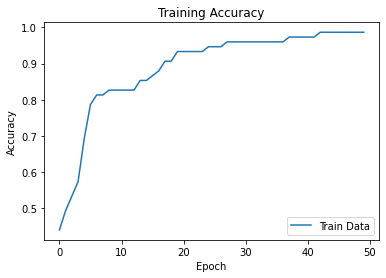

In [23]:
#creating a plot to display accurancy over each epoch
plt.plot(history.history['acc'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Data'], loc='lower right')
plt.show()